In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Set options
ox.settings.use_cache = True
ox.settings.log_console = True

In [2]:
city_name = "Madrid, Spain"

# Walkable network
G_walk = ox.graph_from_place(city_name, network_type='walk')

# Bikeable network
G_bike = ox.graph_from_place(city_name, network_type='bike')

# Drivable network
G_drive = ox.graph_from_place(city_name, network_type='drive')

In [3]:
# OJO!! Sacar delimetaciones de barrios
# Download neighborhoods
neighborhoods = ox.features_from_place(city_name, tags={'place': 'neighbourhood'})

# Display the neighborhoods
neighborhoods[['name', 'geometry']].head()

name                   geometry
element id                                                       
node    76734240          Montecarmelo  POINT (-3.69798 40.50557)
        255278597           Las Tablas   POINT (-3.6712 40.50611)
        255453672          Sanchinarro   POINT (-3.6564 40.49319)
        347277264  Barrio de la Latina  POINT (-3.71106 40.41238)
        355167675           Valdebebas  POINT (-3.61386 40.48599)

In [4]:
# Keep relevant columns
neighborhoods = neighborhoods[['geometry', 'name']].dropna()
neighborhoods

geometry  \
element  id                                                               
node     76734240                             POINT (-3.69798 40.50557)   
         255278597                             POINT (-3.6712 40.50611)   
         255453672                             POINT (-3.6564 40.49319)   
         347277264                            POINT (-3.71106 40.41238)   
         355167675                            POINT (-3.61386 40.48599)   
         359433739                             POINT (-3.7864 40.38411)   
         561210611                            POINT (-3.65872 40.37261)   
         1862923374                           POINT (-3.70823 40.41534)   
         1862926475                           POINT (-3.69933 40.42274)   
         1862928844                           POINT (-3.70423 40.42671)   
         1862937674                           POINT (-3.70089 40.41527)   
         2813277773                           POINT (-3.66681 40.43846)   
         3434168948                            POINT (-3.70096 40.4084)   
         3557195254                           POINT (-3.64158 40.50677)   
         7188910352                           POINT (-3.71018 40.48338)   
         7188910353                           POINT (-3.74778 40.37826)   
         7188910354                           POINT (-3.59546 40.44707)   
         7191797676                             POINT (-3.63102 40.481)   
         7738033165                           POINT (-3.68868 40.48542)   
         7744591450                           POINT (-3.68476 40.47841)   
         7778227694                            POINT (-3.7051 40.47426)   
         7792158894                           POINT (-3.72029 40.46892)   
         7792158895                            POINT (-3.72778 40.4668)   
         8418329518                           POINT (-3.71349 40.46044)   
         8755258956                           POINT (-3.68727 40.46038)   
         8962303151                            POINT (-3.67407 40.4836)   
         9363649288                           POINT (-3.76519 40.45157)   
         9667620983                           POINT (-3.66198 40.48772)   
         11230913270                           POINT (-3.71206 40.3914)   
         11739514732                          POINT (-3.68786 40.35129)   
         13473202946                          POINT (-3.64656 40.47457)   
relation 16123672     POLYGON ((-3.70913 40.32327, -3.7033 40.3222, ...   
way      315271245    POLYGON ((-3.64914 40.47754, -3.65142 40.47683...   

                                                    name  
element  id                                               
node     76734240                           Montecarmelo  
         255278597                            Las Tablas  
         255453672                           Sanchinarro  
         347277264                   Barrio de la Latina  
         355167675                            Valdebebas  
         359433739                            Campamento  
         561210611              El Pozo del Tío Raimundo  
         1862923374               Barrio de los Austrias  
         1862926475                               Chueca  
         1862928844                             Malasaña  
         1862937674                 Barrio de las Letras  
         2813277773                    Barrio del Parral  
         3434168948                             Lavapiés  
         3557195254                 Encinar de los Reyes  
         7188910352            Ciudad de los Periodistas  
         7188910353                 Colonia de la Prensa  
         7188910354                        Ciudad Pegaso  
         7191797676           Las Cárcavas - San Antonio  
         7738033165                               Begoña  
         7744591450             Colonia de San Cristóbal  
         7778227694                             Altamira  
         7792158894                 Ciudad de los Poetas  
         7792158895  

In [ ]:
# Schools
schools = ox.features_from_place(city_name, tags={'amenity': 'school'})


# Hospitals
hospitals = ox.features_from_place(city_name, tags={'amenity': 'hospital'})
hospitals = hospitals[['geometry', 'amenity']].dropna()

# Supermarkets
supermarkets = ox.features_from_place(city_name, tags={'shop': 'supermarket'})
supermarkets = supermarkets[['geometry', 'shop']].dropna()
supermarkets = supermarkets.rename(columns={'shop': 'amenity'})

In [ ]:
schools

NameError: name 'school' is not defined

In [ ]:
destinations = gpd.GeoDataFrame(pd.concat([schools, hospitals, supermarkets]))
destinations

geometry amenity  \
element id                                                                      
node    266167459                           POINT (-3.75011 40.40752)  school   
        266167460                           POINT (-3.59813 40.44721)  school   
        266167469                           POINT (-3.76221 40.36286)  school   
        266167485                           POINT (-3.65085 40.44344)  school   
        266167487                           POINT (-3.75823 40.37224)  school   
...                                                               ...     ...   
way     1323838404  POLYGON ((-3.63664 40.37186, -3.63705 40.37206...     NaN   
        1349516824  POLYGON ((-3.68219 40.42593, -3.68201 40.42593...     NaN   
        1375960629  POLYGON ((-3.77494 40.37304, -3.77502 40.37274...     NaN   
        1461816349  POLYGON ((-3.63553 40.47209, -3.63498 40.47204...     NaN   
        1464348938  POLYGON ((-3.6215 40.48109, -3.62103 40.4811, ...     NaN   

                           shop  
element id                       
node    266167459           NaN  
        266167460           NaN  
        266167469           NaN  
        266167485           NaN  
        266167487           NaN  
...                         ...  
way     1323838404  supermarket  
        1349516824  supermarket  
        1375960629  supermarket  
        1461816349  supermarket  
        1464348938  supermarket  

[2079 rows x 3 columns]

Un mapa de isócronas es una herramienta de visualización geográfica que delimita áreas alcanzables desde un punto de origen en un tiempo de viaje específico, utilizando modos de transporte como caminar, bicicleta o vehículo. A diferencia de los radios de distancia simples, estas líneas consideran factores como el tráfico, límites de velocidad y la red vial. 

In [7]:
def create_isochrone(G, center_point, travel_speed_kph, travel_minutes):
    # velocidad en metros/minuto
    speed_m_per_min = travel_speed_kph * 1000 / 60

    # nodo más cercano
    center_node = ox.distance.nearest_nodes(G, center_point.x, center_point.y)

    # distancias desde el nodo central
    lengths = nx.single_source_dijkstra_path_length(G, center_node, weight='length')

    max_distance = travel_minutes * speed_m_per_min
    reachable_nodes = [n for n, d in lengths.items() if d <= max_distance]

    # coordenadas de los nodos
    coords = [(G.nodes[n]['x'], G.nodes[n]['y']) for n in reachable_nodes]

    if not coords:
        return None

    return MultiPoint(coords).convex_hull

In [8]:
# Centroides de los barrios
neighborhoods = neighborhoods.to_crs(epsg=3857)
neighborhoods['centroid'] = neighborhoods.geometry.centroid
neighborhoods = neighborhoods.to_crs(epsg=4326)

neighborhood_isochrones = []

for _, row in neighborhoods.iterrows():
    iso = create_isochrone(
        G_walk,
        row['centroid'],
        travel_speed_kph=5,   # caminar
        travel_minutes=10
    )
    if iso is not None:
        neighborhood_isochrones.append(iso)


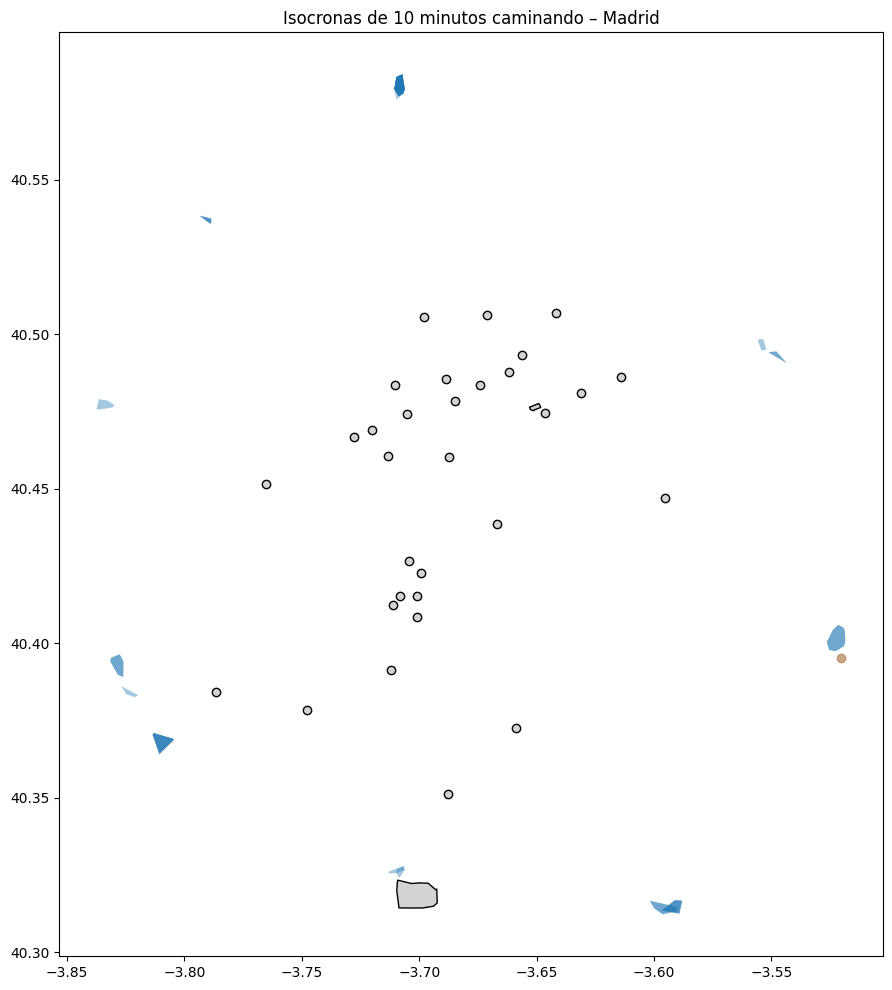

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax, color='lightgrey', edgecolor='black')

for iso in neighborhood_isochrones:
    gpd.GeoSeries([iso], crs="EPSG:4326").plot(
        ax=ax,
        alpha=0.4
    )

plt.title("Isocronas de 10 minutos caminando – Madrid")
plt.show()